<a href="https://colab.research.google.com/github/tushwagh/Online-Retail-Customer-Segmentation-/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [249]:
# Importing common libraries
import numpy as np #for handling arrays
import pandas as pd #for data manipulation, read_excel
from numpy import math

%matplotlib inline
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns; sns.set()
import seaborn as sns #for better visualizations

from datetime import datetime as dt
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [250]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:
# Importing Library
file_path="/content/drive/MyDrive/Online retail/Online Retail.xlsx"

In [252]:
data= pd.read_excel(file_path)

##**Data Exploration**

In [253]:
# First look
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [254]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [255]:
data.shape

(541909, 8)

**Shape of our dataset is (541909, 8) that means we have 541909 number of rows and 8 columns**

In [256]:
# Checking for null values and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


We can see that there is null values in **CustomerID** and **Description** columns.

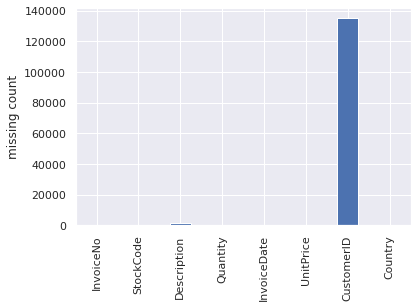

In [257]:
# Checking Null Value by plotting Barplot
data.isnull().sum().plot.bar()
plt.ylabel('missing count');

In [258]:
# checking null values %
data['CustomerID'].isnull().sum()*100/len(data)

24.926694334288598

**Imputing missing CustomerID is not possible and our main task is of customer segmentation so we will drop missing CustomerID values which are around 25%.**

In [259]:
# Total null values of CustomerID
data['CustomerID'].isnull().sum()

135080

In [260]:
# Total null values of Description column
data['Description'].isnull().sum()

1454

**There are 135080 missing values in CustoemerId column and
1454 missing values in description column** 

##**Dataset Information**

In [261]:
# Columns and data types
print("Columns and data types")
pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [262]:
#column names
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [263]:
#To check distribution describing dataset
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [264]:
# figuring data types
numerical_columns=list(data.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

In [265]:
# categorical columns
categorical_columns=list(data.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [266]:
# find unique values of categorical column
def unique_name_no(col):
  print(data[col].unique())
  print(data[col].nunique())


for i in categorical_columns:
  print(i.upper())
  unique_name_no(i)

INVOICENO
[536365 536366 536367 ... 581585 581586 581587]
25900
STOCKCODE
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
4070
DESCRIPTION
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
4223
COUNTRY
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
38


In [267]:
# duplicate
len(data[data.duplicated()])

5268

In [268]:
#duplicate records
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [269]:
# Dropping Duplicate Rows
data=data.drop_duplicates()
len(data[data.duplicated()])

0

**Dataset after removing duplicate values.**



In [270]:
#checking null values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

**There are 541909 rows and 8 columns in above dataset.**

**Above dataset has missing value on Description & CustomerID.**

**There are 5268 duplicate values.**

In [271]:
data = data.dropna(subset=['CustomerID'],axis=0)
data.isna().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [272]:
data.shape

(401604, 8)

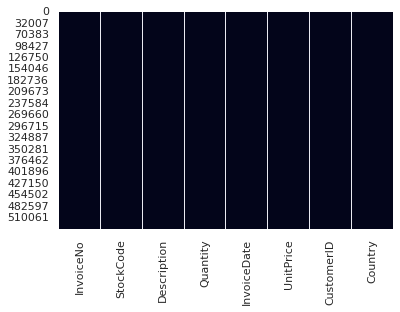

In [273]:
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

In [274]:
#checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


**After removing null and duplicate values in our dataset. It reduces to (401604, 8)**

In [275]:
#treatment of InvoiceNo
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

In [276]:
# removing InvoiceNo which contains C
data=data[~data['InvoiceNo'].str.contains('C')]

**We have to drop some InvoiceNo which are starts with 'C' because 'C', it indicates a cancellation**

In [277]:
#rows and columns
data.shape

(392732, 8)

**Now after treatment of Dataset, We have 392732 rows and 8 columns.**

In [278]:
#checking distribution
data.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [279]:
# filtering only United Kingdom customers data
ukretail_df= data[data['Country'] == 'United Kingdom']

In [280]:
# filtering cancelled orders
ukretail_df= ukretail_df[ukretail_df['Quantity']>0]

In [281]:
# total cost
ukretail_df['total_cost'] = ukretail_df["Quantity"] * ukretail_df["UnitPrice"]

In [320]:
# checking dates
print(f"first date: {ukretail_df['InvoiceDate'].min()}")
print(f"latest date: {ukretail_df['InvoiceDate'].max()}")

first date: 2010-12-01 08:26:00
latest date: 2011-12-09 12:49:00


In [285]:
ukretail_df.shape

(349227, 9)

**Creating total cost column**

In [286]:
ukretail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [287]:
ukretail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349227 non-null  object        
 1   StockCode    349227 non-null  object        
 2   Description  349227 non-null  object        
 3   Quantity     349227 non-null  int64         
 4   InvoiceDate  349227 non-null  datetime64[ns]
 5   UnitPrice    349227 non-null  float64       
 6   CustomerID   349227 non-null  float64       
 7   Country      349227 non-null  object        
 8   total_cost   349227 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 26.6+ MB


**Now data is clean we can perform EDA**

##**Exploratory Data Analysis**

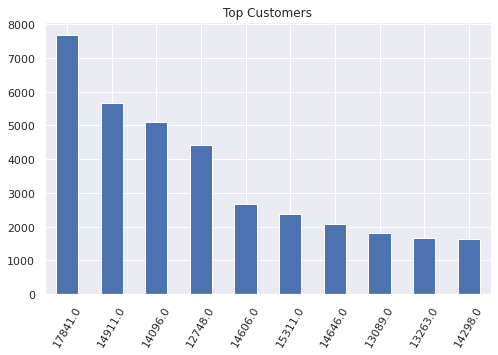

In [288]:
cmr_df= data['CustomerID'].value_counts()
# top customers 
plt.figure(figsize=(8,5))
cmr_df.head(10).plot.bar()
plt.title('Top Customers')
plt.xticks(rotation=60);

**These are the top customers of the retail store and 17841 CustomerID has most number of transactions 7500+. This customer must be the wholesale customer of the store.**

In [289]:
data[data['CustomerID']==17841.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2037,536557,21495,SKULLS AND CROSSBONES WRAP,25,2010-12-01 14:41:00,0.42,17841.0,United Kingdom
2038,536557,46000R,POLYESTER FILLER PAD 45x30cm,2,2010-12-01 14:41:00,1.45,17841.0,United Kingdom
2039,536557,46000S,POLYESTER FILLER PAD 40x40cm,1,2010-12-01 14:41:00,1.45,17841.0,United Kingdom
2040,536557,22731,3D CHRISTMAS STAMPS STICKERS,1,2010-12-01 14:41:00,1.25,17841.0,United Kingdom
2041,536557,21258,VICTORIAN SEWING BOX LARGE,1,2010-12-01 14:41:00,12.75,17841.0,United Kingdom
...,...,...,...,...,...,...,...,...
537748,581334,22077,6 RIBBONS RUSTIC CHARM,1,2011-12-08 12:07:00,1.95,17841.0,United Kingdom
537749,581334,23399,HOME SWEET HOME HANGING HEART,3,2011-12-08 12:07:00,0.85,17841.0,United Kingdom
537750,581334,22893,MINI CAKE STAND T-LIGHT HOLDER,12,2011-12-08 12:07:00,0.42,17841.0,United Kingdom
537751,581334,22371,AIRLINE BAG VINTAGE TOKYO 78,1,2011-12-08 12:07:00,4.25,17841.0,United Kingdom


**Exploring Country column**

In [290]:
# number of countrys
country_cnt = data['Country'].value_counts()
len(country_cnt)

37

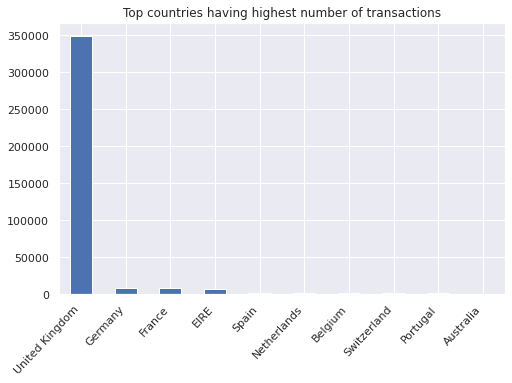

In [291]:
# top countries having highest number of transactions
plt.figure(figsize=(8,5))
country_cnt.head(10).plot.bar()
plt.title('Top countries having highest number of transactions');
plt.xticks(rotation=47, ha="right")
plt.show()

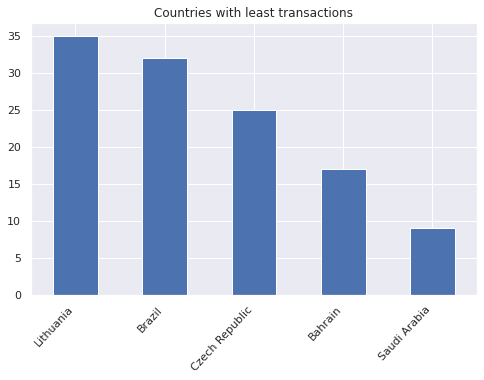

In [292]:
# countries with least transactions
plt.figure(figsize=(8,5))
country_cnt.tail().plot.bar()
plt.title('Countries with least transactions')
plt.xticks(rotation=47, ha="right")
plt.show()

Countries with least transactions:

1.Lithuania

2.Brazil

3.Czech Republic

4.Bahrain

5.Saudi Arabia

In [293]:
# checking transaction % in UK
tr_uk = round(len(data[data['Country']=='United Kingdom']) / len(data) * 100,2)
print(f"{tr_uk}% transactions are from United Kingdom.")

88.92% transactions are from United Kingdom.


##**Data Insights**

###**1.What is the average quantity customers purchase per order?**

In [321]:
# extract the date from datetime
def extract_date(datetime_obj):
  return datetime_obj.date()

In [322]:
# assigning date column
data['date'] = data['InvoiceDate'].apply(extract_date)

In [323]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [324]:
qtywise_ctr= data.groupby(['CustomerID','date'])['Quantity'].sum().reset_index()
qtywise_ctr.sort_values(by='Quantity', ascending=False).head()

,CustomerID,date,Quantity
11646,16446.0,2011-12-09,80995
0,12346.0,2011-01-18,74215
14376,17450.0,2011-09-20,25930
6759,14646.0,2011-10-20,18140
159,12415.0,2011-06-15,15241


In [325]:
qtywise_ctr['Quantity'].describe()

count    16766.000000
mean       308.116784
std       1073.241032
min          1.000000
25%         87.000000
50%        168.000000
75%        311.000000
max      80995.000000
Name: Quantity, dtype: float64

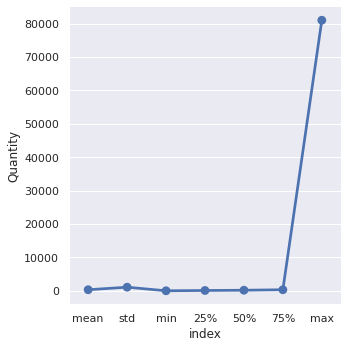

In [326]:
# descriptive statistics plot
describe_qnty_df = qtywise_ctr.describe()
describe_qnty_df.reset_index(inplace=True)
describe_qnty_df = describe_qnty_df[describe_qnty_df['index'] != 'count']
sns.factorplot(x='index', y='Quantity', data=describe_qnty_df)
plt.show()

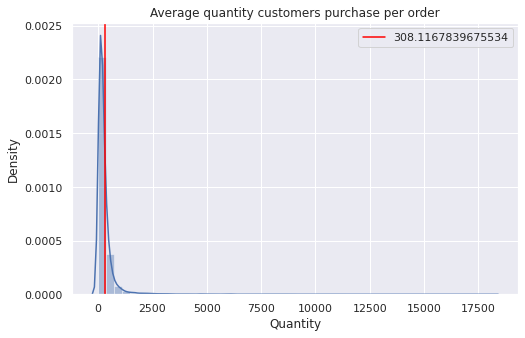

In [327]:
# Average quantity customers purchase per order
data3= qtywise_ctr[qtywise_ctr['Quantity']<25930.0]
plt.figure(figsize=(8,5))
sns.distplot(data3['Quantity'])
plt.xlabel("Quantity")
xmean=qtywise_ctr['Quantity'].mean()
plt.axvline(x=xmean, color='red', label= xmean)
plt.legend()
plt.title("Average quantity customers purchase per order");

###**2.What is the average number of orders per customer?**

In [328]:
# average quantity
avg_qnty= qtywise_ctr.groupby(['CustomerID'],as_index=False).agg({'Quantity':'mean'}).rename(columns={'Quantity':'qnty/order'})
orders_df= qtywise_ctr['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID', 'CustomerID':'orders'}).sort_values(by='CustomerID')
avg_qnty= avg_qnty.merge(orders_df)
avg_qnty.head()

,CustomerID,qnty/order,orders
0,12346.0,74215.000000,1
1,12347.0,351.142857,7
2,12348.0,585.250000,4
3,12349.0,631.000000,1
4,12350.0,197.000000,1


In [329]:
avg_qnty['orders'].describe()

count    4339.000000
mean        3.864024
std         5.952745
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       132.000000
Name: orders, dtype: float64

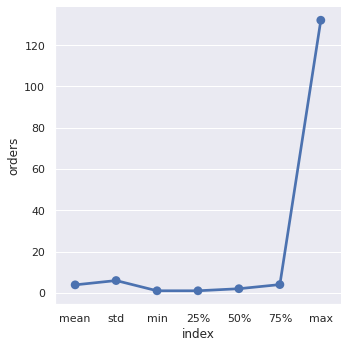

In [330]:
describe_orders_df = avg_qnty.describe()
describe_orders_df.reset_index(inplace=True)
describe_orders_df = describe_orders_df[describe_orders_df['index'] != 'count']
sns.factorplot(x='index', y='orders', data=describe_orders_df)
plt.show()

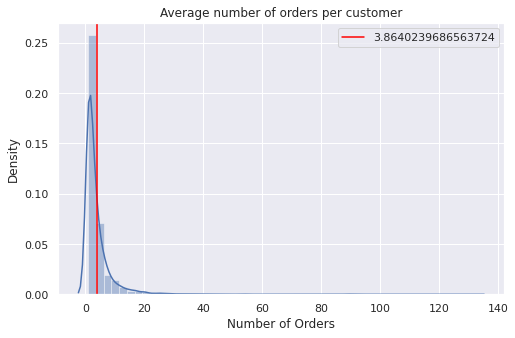

In [331]:
# Average number of orders per customer
plt.figure(figsize=(8,5))
sns.distplot(avg_qnty['orders'])
plt.xlabel("Number of Orders")
xmean=avg_qnty['orders'].mean()
plt.axvline(x=xmean, color='red', label= xmean)
plt.legend()
plt.title("Average number of orders per customer");

**Customers have placed orders 4 or 5 times on average and maximum number of orders being 146 from a single customer.**

###**3.Top customers buying maximum quantity**

In [332]:
# filtering based on orders above 5 and Quantity greater than 0
filtered_avg_qnty = avg_qnty[(avg_qnty['orders']>=5) & (avg_qnty['qnty/order']>0)]
filtered_avg_qnty.head()

,CustomerID,qnty/order,orders
1,12347.0,351.142857,7
5,12352.0,76.571429,7
15,12362.0,222.900000,10
30,12381.0,161.600000,5
31,12383.0,306.400000,5


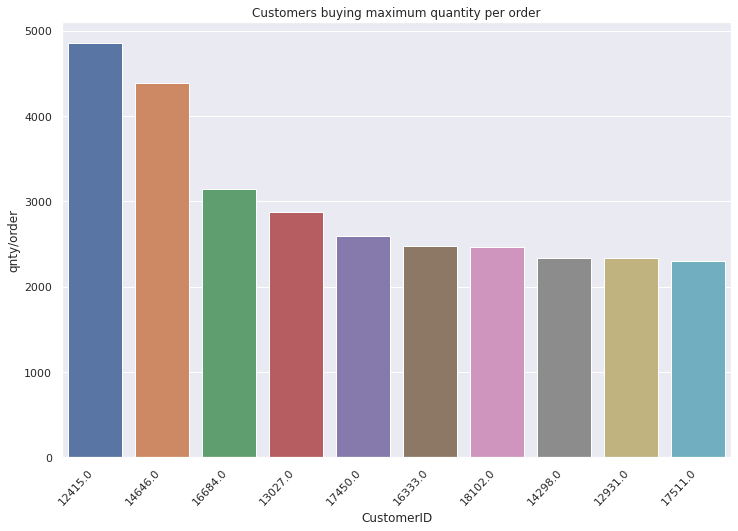

In [333]:
# Customers buying maximum quantity on average per order
data1= filtered_avg_qnty.sort_values(by='qnty/order',ascending=False).head(10)

# plot
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.barplot(x='CustomerID', y='qnty/order', data= data1, order=data1['CustomerID'])
ax.set_title('Customers buying maximum quantity per order')
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

**These are the customers buying maximum average quantity per order. These could be the wholesalers who buy in bulk.**

###**4.Top customers with highest number of orders**

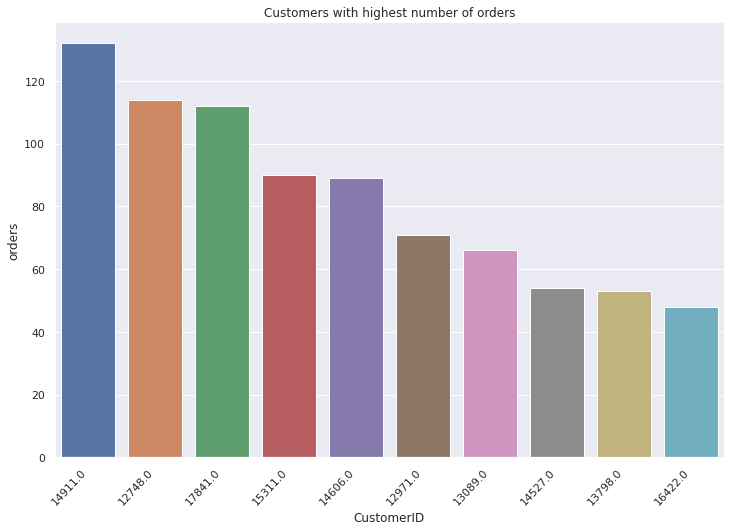

In [334]:
# Customers with highest number of orders
data2= filtered_avg_qnty.sort_values(by='orders',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12,8))
ax=sns.barplot(x='CustomerID', y='orders', data= data2, order=data2['CustomerID'])
ax.set_title('Customers with highest number of orders')
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

###**5.Which Country has most customers?**

In [335]:
cmr_cty_df= data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
cmr_cty_df= cmr_cty_df.reset_index().rename(columns={'CustomerID':'Number_of_Customers'})
cmr_cty_df.head()

,Country,Number_of_Customers
0,United Kingdom,3921
1,Germany,94
2,France,87
3,Spain,30
4,Belgium,25


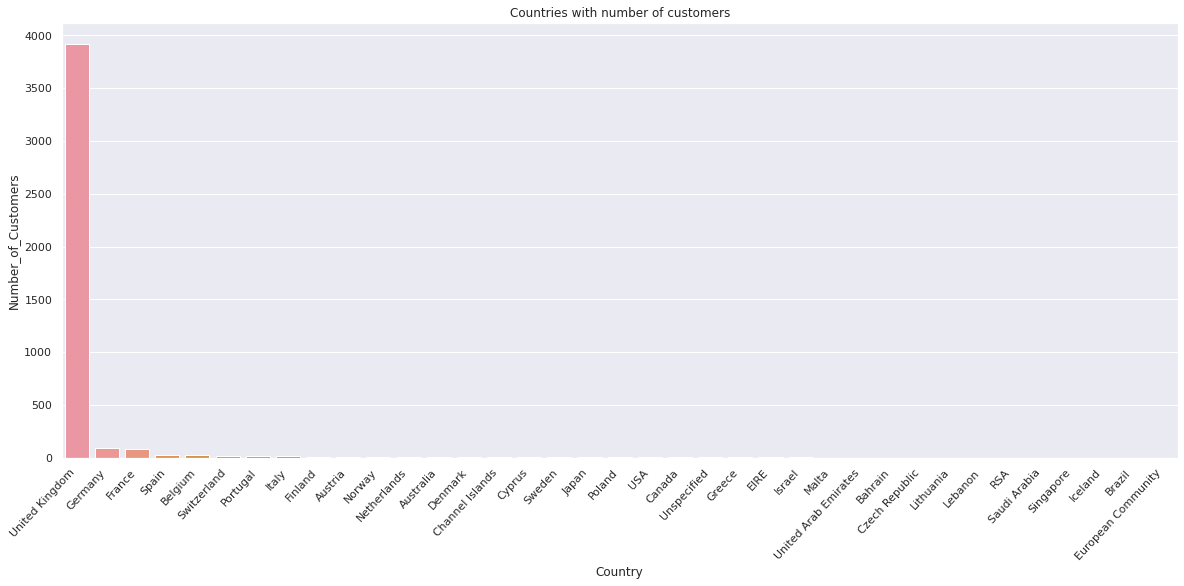

In [309]:
fig, ax = plt.subplots(figsize=(20,8))
ax=sns.barplot(x='Country', y='Number_of_Customers',data=cmr_cty_df,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
ax.set_title('Countries with number of customers')
plt.show()

In [337]:
# filtering only United Kingdom customers data
ukretail_df= data[data['Country'] == 'United Kingdom']

In [338]:
# filtering cancelled orders
ukretail_df= ukretail_df[ukretail_df['Quantity']>0]

In [339]:
# total cost
ukretail_df['total_cost'] = ukretail_df["Quantity"] * ukretail_df["UnitPrice"]

In [340]:
# checking dates
print(f"first date: {ukretail_df['date'].min()}")
print(f"latest date: {ukretail_df['date'].max()}")

first date: 2010-12-01
latest date: 2011-12-09


In [341]:
ukretail_df.shape

(349227, 10)

In [342]:
ukretail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [343]:
ukretail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 541893
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349227 non-null  object        
 1   StockCode    349227 non-null  object        
 2   Description  349227 non-null  object        
 3   Quantity     349227 non-null  int64         
 4   InvoiceDate  349227 non-null  datetime64[ns]
 5   UnitPrice    349227 non-null  float64       
 6   CustomerID   349227 non-null  float64       
 7   Country      349227 non-null  object        
 8   date         349227 non-null  object        
 9   total_cost   349227 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 29.3+ MB


##**RFM Analysis**


To calculate recency, We will fix a reference date for finding the recent transactions. The reference date would be a day after the most recent transaction date in the dataset. Then we will calculate the days difference between the most recent transaction carried out by the customer and this reference date.

In [344]:
# setting reference date as 2011-12-10
ref_date= dt.date(2011,12,10)

In [345]:
# checking recent purchase date
recency_df = ukretail_df.groupby("CustomerID")['date'].max().reset_index()
recency_df = recency_df.rename(columns={'date':'recent_purchase'})
recency_df.head()

,CustomerID,recent_purchase
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [346]:
# calculate recency
recency_df['Recency'] = recency_df['recent_purchase'].apply(lambda x: (ref_date - x).days)

In [347]:
recency_df.head()

,CustomerID,recent_purchase,Recency
0,12346.0,2011-01-18,326
1,12747.0,2011-12-07,3
2,12748.0,2011-12-09,1
3,12749.0,2011-12-06,4
4,12820.0,2011-12-06,4


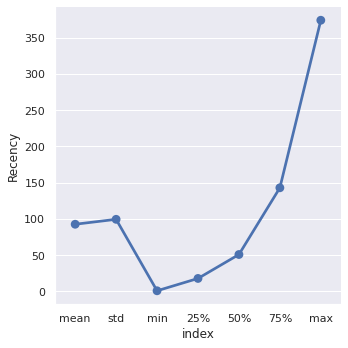

In [348]:
# Descriptive Statistics of Recency
describe_recency = recency_df.describe()
describe_recency.reset_index(inplace=True)
describe_recency = describe_recency[describe_recency['index'] != 'count']
sns.factorplot(x='index', y='Recency', data=describe_recency)
plt.show()

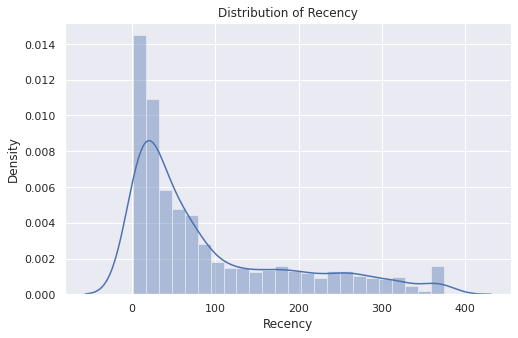

In [349]:
# Distribution of Recency
plt.figure(figsize=(8,5))
sns.distplot(recency_df['Recency'])
plt.title("Distribution of Recency");


**We can see that there are more customers who have purchased recently and the graph decrease furthur.**

##**Frequency**

In [350]:
frequency_df = ukretail_df.groupby('CustomerID').agg({'InvoiceNo': 'count'}).reset_index()
frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace= True)
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4413
3,12749.0,199
4,12820.0,59


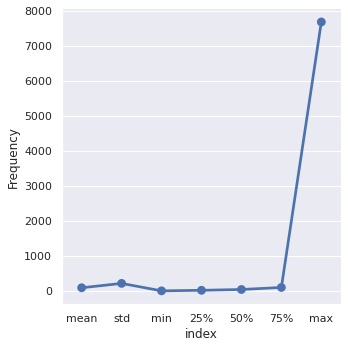

In [351]:
# Descriptive Statistics of frequency
describe_frequency = frequency_df.describe()
describe_frequency.reset_index(inplace=True)
describe_frequency = describe_frequency[describe_frequency['index'] != 'count']
sns.factorplot(x='index', y='Frequency', data=describe_frequency)
plt.show()

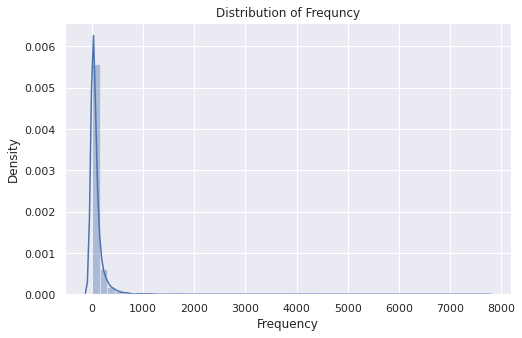

In [352]:
# Distribution of Frequncy
plt.figure(figsize=(8,5))
sns.distplot(frequency_df['Frequency'])
plt.title("Distribution of Frequncy");

**The distribution of frequency is skewed.**

##**Monetory**

In [353]:
monetary_df = ukretail_df.groupby('CustomerID').agg({'total_cost': 'sum'}).reset_index()
monetary_df.rename(columns={'total_cost': 'Monetary'}, inplace= True)
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33053.19
3,12749.0,4090.88
4,12820.0,942.34


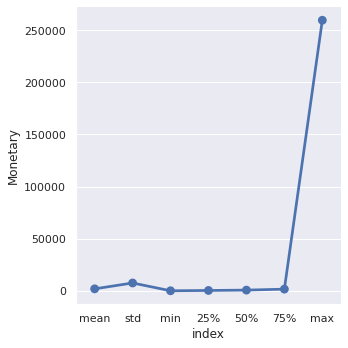

In [354]:
# Descriptive Statistics of monetary
describe_monetary = monetary_df.describe()
describe_monetary.reset_index(inplace=True)
describe_monetary = describe_monetary[describe_monetary['index'] != 'count']
sns.factorplot(x='index', y='Monetary', data=describe_monetary)
plt.show()


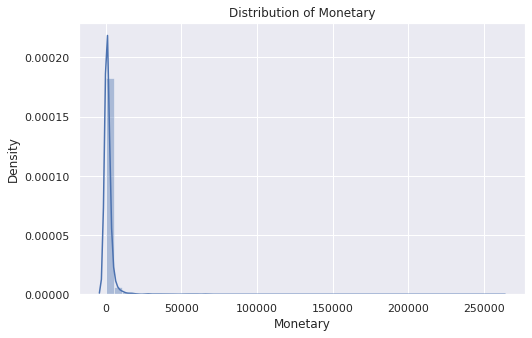

In [355]:
# Distribution of Monetary
plt.figure(figsize=(8,5))
sns.distplot(monetary_df['Monetary'])
plt.title("Distribution of Monetary");

**The distribution of Monetary value is also skewed.**

In [356]:
# combining Recency, Frequency and Monetary
rfm_df= recency_df.merge(frequency_df, how="outer")
rfm_df= rfm_df.merge(monetary_df, how="outer")
rfm_df.drop("recent_purchase", axis=1, inplace=True)
rfm_df.set_index("CustomerID", inplace=True)

In [357]:
rfm_df.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12747.0,3,103,4196.01
12748.0,1,4413,33053.19
12749.0,4,199,4090.88
12820.0,4,59,942.34
12821.0,215,6,92.72
12822.0,71,46,948.88
12823.0,75,5,1759.50
12824.0,60,25,397.12


In [358]:

rfm_df.describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,92.722265,89.065800,1857.950687
std,99.528532,214.022733,7477.736186
min,1.000000,1.000000,0.000000
25%,18.000000,17.000000,298.110000
50%,51.000000,40.000000,644.300000
75%,143.000000,98.000000,1570.810000
max,374.000000,7676.000000,259657.300000


We can see the minimum monetary value is 0 and it do not make sense to us so will remove the rows with 0 monetary value.

In [359]:
rfm_df= rfm_df[rfm_df['Monetary'] > 0]

We will assign the score from 1 to 4 on the basis of recency, frequency and monetary based on there quartiles.

4 being the best score and 1 being the worst score. A final score will be calculated simply by combining individual RFM scores.

In [360]:
# quartiles
quartiles= rfm_df.quantile(q=[0.25,0.5,0.75])
quartiles

,Recency,Frequency,Monetary
0.25,18.0,17.0,298.185
0.50,51.0,40.0,644.975
0.75,143.0,98.0,1571.285


Higher recency is bad so it will get the lesser score but in case of frequency and monetary higher values are good so they will get higher scores.
